In [26]:
import matplotlib.pyplot as plt
from matplotlib import style
import numpy as np
import pandas as pd
import seaborn as sns
from pprint import pprint
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score, r2_score
from heapq import heappush, heappop
import sys

def mean_square(X,Y,theta):
    return np.sum(np.power(((X @ theta.T) - y), 2)) / (2 * len(X))


# Split Data

In [224]:
def SplitTestTrain(X, Y,percent = 0.8):
    mask = np.random.rand(len(X))<percent
    X_train = X[mask].dropna()
    X_test  = X[~mask].dropna()
    X_Test  =  X_test
    Y_train = Y[mask].dropna()
    Y_test  = Y[~mask].dropna()
    #print(X_train.shape, X_test.shape)
    X_train = X_train.reset_index(drop = True)
    X_test  = X_test.reset_index(drop = True)
    Y_train = Y_train.reset_index(drop = True)
    X_Test  =  Y_train
    Y_test  = Y_test.reset_index(drop = True)
    return X_train, X_test, Y_train ,Y_test

# Preprocessing

In [6]:
def standardize(X):
    X_standardized = (X - X.mean()) /X.std()
    return X_standardized


In [7]:
def Normalise(df):
    normalized_df=(df-df.min())/(df.max()-df.min())
    return normalized_df

In [8]:
def preprocessing(X,type = "Normalise"):
    if(type == "Normalise"):
        return Normalise(X)
    else:
        return standardize(X)

# GradientDescent

In [228]:
def GradientDescent(train_X, train_Y,theta,alpha,iteration):
    
    m = train_X.shape
    for i in range(iteration):
        theta = theta - (alpha / len(train_X)) * np.sum(train_X * (train_X @ theta.T - train_Y), axis=0)
    return theta

            

In [229]:
th = [0,100,200]
itr =[50,100,150,200,250,300,350,400,500,800,1000] 

# Train

In [230]:
def train(train_X,train_Y,preprocess,theta,alpha,it):
    train_X = preprocessing(train_X,preprocess)
    train_X = train_X.values
    ones    = np.ones([train_X.shape[0],1])
    train_X = np.concatenate((ones,train_X),axis=1)
    train_Y = train_Y.values
    #theta   = np.zeros([1,train_X.shape[1]])
    theta = GradientDescent(train_X, train_Y,theta,alpha,it)
    return theta
    


    

# Predict

In [231]:
def predict(test_X,theta,preprocess):
    test_X = preprocessing(test_X,preprocess)
    test_X = test_X.values
    ones   = np.ones([test_X.shape[0],1])
    test_X = np.concatenate((ones, test_X), axis =1)
    return (test_X @ theta.T).flatten()


In [232]:
from sklearn.metrics import mean_squared_error
def CalculateMSE():
    MSE = []
    NasaData = pd.read_csv("airfoil.csv")
    NasaData.columns = ['A', 'B', 'C', 'D','E','F']
    NasaData_X = NasaData.drop(['F'],axis = 1)
    NasaData_Y = NasaData[['F']]
    NasaData_Y.columns = ['F']
    NasaDataTrain_X, NasaDataTest_X, NasaDataTrain_Y,  NasaDataTest_Y = SplitTestTrain(
    NasaData_X, NasaData_Y)
    alpha = 0.009
    for Theta in th:
        theta = np.full((1,NasaDataTrain_X.shape[1]+1),Theta)
        print(theta.shape)
        print(type(theta))
        a = []
        for it in  itr:
            theta = train(NasaDataTrain_X,NasaDataTrain_Y,"std",theta,alpha,it)
            pre = predict(NasaDataTest_X,theta,"std")
            a.append(mean_squared_error(NasaDataTest_Y,pre))
        MSE.append(a)
    return MSE
MSE = CalculateMSE()
#print(MSE)

            
    
    

(1, 6)
<class 'numpy.ndarray'>
(1, 6)
<class 'numpy.ndarray'>
(1, 6)
<class 'numpy.ndarray'>


# Graph MSE VS Number of iteration For Different Value of theta and fixed alpha

Text(0.5, 1.0, 'Different Values of theta')

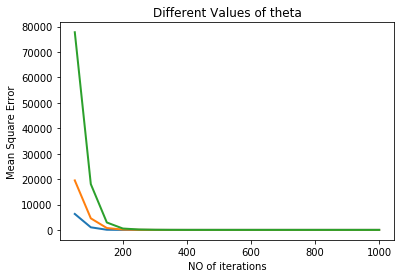

In [233]:
for mse in MSE:
    plt.plot(itr,mse,linewidth=2,markersize=12)
plt.xlabel('NO of iterations')
plt.ylabel('Mean Square Error')
plt.title("Different Values of theta")

# Graph MSE vs Number of Iteration for different Values of alpha and fixed value of theta

In [249]:
alph = [0.001,0.02,0.3]

In [250]:
from sklearn.metrics import mean_squared_error
def CalculateMSEForAlpha():
    MSE = []
    NasaData = pd.read_csv("airfoil.csv")
    NasaData.columns = ['A', 'B', 'C', 'D','E','F']
    NasaData_X = NasaData.drop(['F'],axis = 1)
    NasaData_Y = NasaData[['F']]
    NasaData_Y.columns = ['F']
    NasaDataTrain_X, NasaDataTest_X, NasaDataTrain_Y,  NasaDataTest_Y = SplitTestTrain(
    NasaData_X, NasaData_Y)
    theta = np.full((1,NasaDataTrain_X.shape[1]+1),100)
    for al in alph:
        print(theta.shape)
        print(type(theta))
        a = []
        for it in  itr:
            theta = train(NasaDataTrain_X,NasaDataTrain_Y,"std",theta,al,it)
            pre = predict(NasaDataTest_X,theta,"std")
            a.append(mean_squared_error(NasaDataTest_Y,pre))
        MSE.append(a)
    return MSE
MSE = CalculateMSEForAlpha()

(1, 6)
<class 'numpy.ndarray'>
(1, 6)
<class 'numpy.ndarray'>
(1, 6)
<class 'numpy.ndarray'>


Text(0.5, 1.0, 'Different Values of alpha')

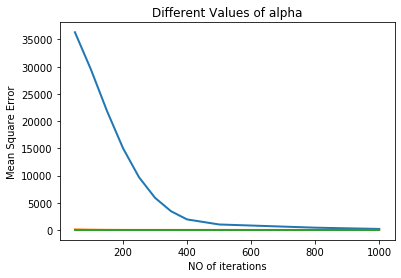

In [251]:
# for mse in MSE:
#     plt.plot(itr,mse,linewidth=2,markersize=12)
plt.plot(itr,MSE[0],linewidth=2,markersize=12)
plt.plot(itr,MSE[1],linewidth=2,markersize=12)
plt.plot(itr,MSE[2],linewidth=2,markersize=12)
plt.xlabel('NO of iterations')
plt.ylabel('Mean Square Error')
plt.title("Different Values of alpha")

In [ ]:

theta = train(NasaDataTrain_X,NasaDataTrain_Y,"std")
Scaled_sound_pressure_level = predict(NasaDataTest_X,theta,"std")

In [29]:
theta = 50
theta = train(NasaDataTrain_X,NasaDataTrain_Y,"std")
Scaled_sound_pressure_level = predict(NasaDataTest_X,theta,"std")
print('R2 Score ',r2_score(NasaDataTest_Y,Scaled_sound_pressure_level ))
print('MSE ',mean_squared_error(NasaDataTest_Y,Scaled_sound_pressure_level))

R2 Score  0.28102179258797866
MSE  30.599670668890766


In [13]:
class Airfoil:
    theta = ""

    def standardize(self,X):
        X_standardized = (X - X.mean()) /X.std()
        return X_standardized
    def Normalise(self,df):
        normalized_df=(df-df.min())/(df.max()-df.min())
        return normalized_df
    def GradientDescent(self,train_X, train_Y):
        iteration = 10000
        alpha = 0.009
        m = train_X.shape
        for i in range(iteration):
            self.theta = self.theta - (alpha / len(train_X)) * np.sum(train_X * (train_X @ self.theta.T - train_Y), axis=0)
    def train(self,train_X ,train_Y):
        #NasaData = pd.read_csv(filename)
        #NasaData.columns = ['A', 'B', 'C', 'D','E','F']
        #train_X = NasaData.drop(['F'],axis = 1)
        #train_Y = NasaData[['F']]
        #train_Y.columns = ['F']
        train_X = self.preprocessing(train_X,"std")
        train_X = train_X.values
        ones    = np.ones([train_X.shape[0],1])
        train_X = np.concatenate((ones,train_X),axis=1)
        train_Y = train_Y.values
        self.theta   = np.zeros([1,train_X.shape[1]])
        self.GradientDescent(train_X, train_Y)
    def predict(self,filename):
#         test_X = NasaDataTest_X
        test_X = pd.read_csv(filename)
        test_X = preprocessing(test_X,"std")
        test_X = test_X.values
        test_X = test_X[0:test_X.shape[0],0:test_X.shape[1]-1]
        ones   = np.ones([test_X.shape[0],1])
        test_X = np.concatenate((ones, test_X), axis =1)
        return (test_X @ self.theta.T).flatten()
    def preprocessing(self,X,type = "std"):
        if(type == "Normalise"):
            return self.Normalise(X)
        else:
            return self.standardize(X)
    

In [29]:
a = Airfoil()
NasaData = pd.read_csv("./Datasets/q3/train.csv")
NasaData.columns = ['A', 'B', 'C', 'D','E','F']
NasaData_X = NasaData.drop(['F'],axis = 1)
NasaData_Y = NasaData[['F']]
NasaData_Y.columns = ['F']
# NasaDataTrain_X, NasaDataTest_X, NasaDataTrain_Y,  NasaDataTest_Y = SplitTestTrain(
# NasaData_X, NasaData_Y)
a.train(NasaData_X,NasaData_Y)
prd  =a.predict('./Datasets/q3/test.csv') 
Y = pd.read_csv("./Datasets/q3/test.csv")
Y = Y.values
Y = Y[0:Y.shape[0],Y.shape[1]-1:Y.shape[1]]
print(Y.shape)
from sklearn.metrics import mean_squared_error
print('R2 Score ',r2_score(Y,prd ))
print(' MSE ',mean_squared_error(Y,prd))



(300, 1)
R2 Score  0.44542761983256307
 MSE  24.09200839108873


# performance Metrics

### r2 score

In [257]:
print('R2 Score ',r2_score(NasaDataTest_Y,prd ))

R2 Score  0.4609999078915855


### MSE

In [263]:
print('mse ', mean_squared_error(NasaDataTest_Y,prd))

mse  25.521621163053158


### mean absolute error

In [261]:
from sklearn.metrics import mean_absolute_error

print('Mae error ',mean_absolute_error(NasaDataTest_Y,prd))

Mse error  3.871811349466207


# answer 3
#    Qa) when 0-0.5 % of values are missing of that feature
### Ans a)  when missing values are less we can eliminate that row but generally we avoid doing that instead we calculate mean ,median imputation when we deal with the continuous data and we deal with chatagorical data we use mode with repect to the missing value  


#  Qb)  when 8-10% of values are missing of that feature
### Ans b) using Pca we can drop that feature or replace missing values with the imputation

# Qc) when 60-70% values are missing
### ans  c) Just drop the feature , because most of the values are missing , imputation will lead to incorrect result